# Exploratory Analysis

In [2]:
import pandas as pd
import numpy as np
from linearmodels.iv import IV2SLS
import linearmodels as ln
from pystout import pystout
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
# set current directory to master thesis folder
os.chdir('..')

In [4]:
# load data 
base=pd.read_csv('DATA/BaseAnalysis.csv',index_col=0)
DV=pd.read_stata("DATA/Dube & Vargas/origmun_violence_commodities.dta", convert_categoricals=False)
DV.dropna(subset='cofintxlinternalp',inplace=True)

# Prices over time

In [5]:
prices=base[['year','lop','linternalp']].drop_duplicates()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Text(0.5, 0.98, 'Development of Oil and Coffee Prices (1988-2021)')

<Figure size 1400x800 with 0 Axes>

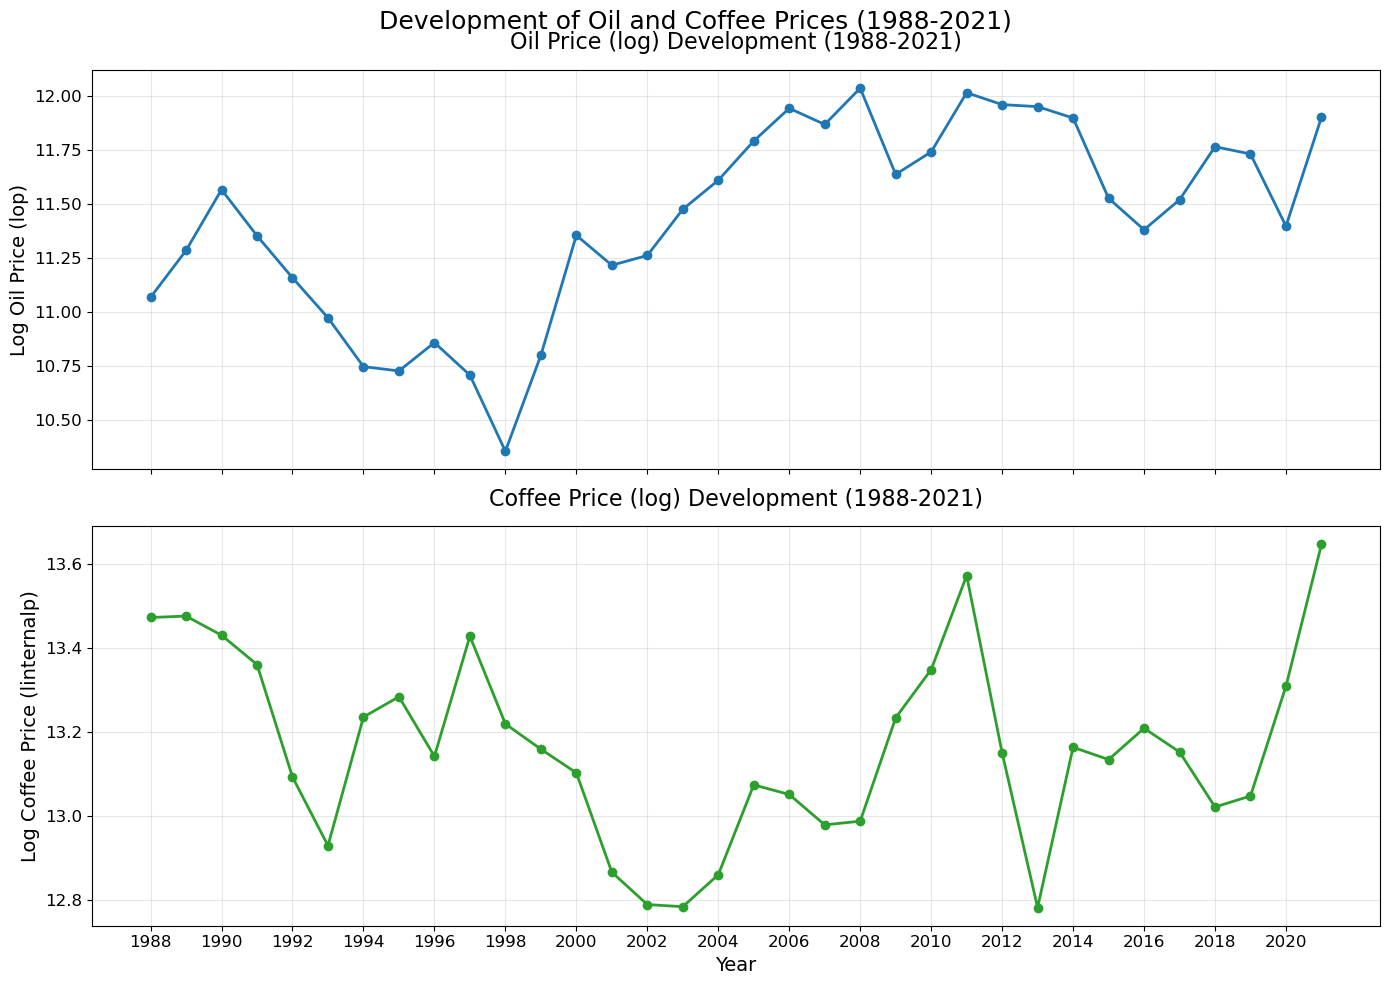

In [7]:
plt.figure(figsize=(14, 8))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot 1: Oil Prices (lop)
ax1.plot(prices['year'], prices['lop'], marker='o', linestyle='-', color='#1f77b4', linewidth=2, markersize=6)
ax1.set_title('Oil Price (log) Development (1988-2021)', fontsize=16, pad=15)
ax1.set_ylabel('Log Oil Price (lop)', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='both', which='major', labelsize=12)

# Plot 2: Coffee Prices (linternalp)
ax2.plot(prices['year'], prices['linternalp'], marker='o', linestyle='-', color='#2ca02c', linewidth=2, markersize=6)
ax2.set_title('Coffee Price (log) Development (1988-2021)', fontsize=16, pad=15)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Log Coffee Price (linternalp)', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Set x-axis ticks to show every 2 years
years_ticks = np.arange(1988, 2022, 2)
plt.xticks(years_ticks)

# Adjust layout and add overall title
plt.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle('Development of Oil and Coffee Prices (1988-2021)', fontsize=18)


# Summary statistics

In [9]:
# extract columns of interest 
base_cols=base[['guerrattacks', 'parattacks', 'posdattacks','clashes','causalities','guerrmass','parmass','posdmass','n_guerrsec','n_parsec','n_posdsec','lpop','lcaprev','oil_production','H_coca','p_cafe','rainfall', 'temperature','oilprod88_dv', 'cofint_dv','rainfall_dv', 'temperature_dv','linternalp','ltop3cof','lop']]

In [10]:
format_dict={
    'count': '{:.0f}'.format,
    'mean': '{:.3f}'.format,
    'std': '{:.3f}'.format,
    'min': '{:.3f}'.format,
    '50%': '{:.3f}'.format,
    'max': '{:.3f}'.format
}
base_cols.describe().T[['count','mean', 'std', 'min','50%', 'max']].to_latex('ANALYSIS\Tables\Summary statistics\sum_stats.tex',formatters=format_dict)

C:\Users\anasa\AppData\Local\Temp\ipykernel_8248\2475752234.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  base_cols.describe().T[['count','mean', 'std', 'min','50%', 'max']].to_latex('ANALYSIS\Tables\Summary statistics\sum_stats.tex',formatters=format_dict)


# Interpretation of the coefficients

In [11]:
# identify and get mean production from producing municipalities 
coffee_producers=DV[DV['cofint']>0]
oil_producers=DV[DV['oilprod88']>0]

In [12]:
# get mean of producing municipalities 
mean_coffee= coffee_producers[coffee_producers['year']==1988][['cofint']].mean()
mean_oil= oil_producers[oil_producers['year']==1988][['oilprod88']].mean()
print('Mean coffee: ', mean_coffee)
print('Mean Oil: ', mean_oil)

Mean coffee:  cofint    1.518575
dtype: float64
Mean Oil:  oilprod88    0.082941
dtype: float64


In [13]:
# identify major important price differences 
cp_1997_2003=float(prices[prices['year']==2003]['linternalp'])-float(prices[prices['year']==1997]['linternalp'])
cp_2003_2005=float(prices[prices['year']==2005]['linternalp'])-float(prices[prices['year']==2003]['linternalp'])
op_1991_1998=float(prices[prices['year']==1998]['lop'])-float(prices[prices['year']==1991]['lop'])
op_1998_2005=float(prices[prices['year']==2005]['lop'])-float(prices[prices['year']==1998]['lop'])

In [14]:
def get_effect(prod_mean, price_diff,coeff, depvar,years):
    total_effect= prod_mean*price_diff*coeff
    print(f'Total effect on {depvar}: ',round(total_effect,5))
    yearly_effect=total_effect/years
    print(f'Yearly effect on {depvar}: ',round(yearly_effect,5))

In [15]:
get_effect(prod_mean=1.518575, price_diff=-0.6435697701344107, coeff=-0.160,depvar='guerrilla', years=6)

Total effect on guerrilla:  0.15637
Yearly effect on guerrilla:  0.02606


### Effect oilproduction 
* my data (1988-2005)

In [16]:
print('Price drop 1991 - 1998')
get_effect(prod_mean=mean_oil,price_diff=op_1991_1998,coeff=0.728, depvar='Guerrilla attacks',years=7)

print('\nPrice increase 1998 - 2005')
get_effect(prod_mean=mean_oil,price_diff=op_1998_2005,coeff=0.728, depvar='Guerrilla attacks',years=7)


Price drop 1991 - 1998
Total effect on Guerrilla attacks:  oilprod88   -0.06016
dtype: float64
Yearly effect on Guerrilla attacks:  oilprod88   -0.00859
dtype: float64

Price increase 1998 - 2005
Total effect on Guerrilla attacks:  oilprod88    0.08664
dtype: float64
Yearly effect on Guerrilla attacks:  oilprod88    0.01238
dtype: float64


In [17]:
op_1998_2005

1.4348571656073386

### Effect coffee prices

In [20]:
# create list with coefficients 
coffee_coeff=[('Guerilla attacks',-0.142), ('Clashes',-0.477),('Causalities',-1.828)]

for coefftup in coffee_coeff: 
    print('\n \n Price drop 1997 - 2003')
    get_effect(prod_mean=mean_coffee,price_diff=cp_1997_2003,coeff=coefftup[1], depvar=coefftup[0],years=6)

    print('\nPrice increase 2003 - 2005')
    get_effect(prod_mean=mean_coffee,price_diff=cp_2003_2005,coeff=coefftup[1], depvar=coefftup[0],years=2)


 
 Price drop 1997 - 2003
Total effect on Guerilla attacks:  cofint    0.13878
dtype: float64
Yearly effect on Guerilla attacks:  cofint    0.02313
dtype: float64

Price increase 2003 - 2005
Total effect on Guerilla attacks:  cofint   -0.0625
dtype: float64
Yearly effect on Guerilla attacks:  cofint   -0.03125
dtype: float64

 
 Price drop 1997 - 2003
Total effect on Clashes:  cofint    0.46618
dtype: float64
Yearly effect on Clashes:  cofint    0.0777
dtype: float64

Price increase 2003 - 2005
Total effect on Clashes:  cofint   -0.20993
dtype: float64
Yearly effect on Clashes:  cofint   -0.10497
dtype: float64

 
 Price drop 1997 - 2003
Total effect on Causalities:  cofint    1.78652
dtype: float64
Yearly effect on Causalities:  cofint    0.29775
dtype: float64

Price increase 2003 - 2005
Total effect on Causalities:  cofint   -0.80452
dtype: float64
Yearly effect on Causalities:  cofint   -0.40226
dtype: float64


In [21]:
# short sample
get_effect(prod_mean=mean_oil,price_diff=0.01,coeff=13.961, depvar='Capital Rvenue',years=1)

# oil price growth 
print('\nPrice increase 1998 - 2005')
get_effect(prod_mean=mean_oil,price_diff=op_1998_2005,coeff=13.961, depvar='Capital Revenue',years=7)


Total effect on Capital Rvenue:  oilprod88    0.01158
dtype: float64
Yearly effect on Capital Rvenue:  oilprod88    0.01158
dtype: float64

Price increase 1998 - 2005
Total effect on Capital Revenue:  oilprod88    1.66148
dtype: float64
Yearly effect on Capital Revenue:  oilprod88    0.23735
dtype: float64


In [22]:
# short sample
get_effect(prod_mean=mean_oil,price_diff=0.01,coeff=8.833, depvar='Capital Rvenue',years=1)

# oil price growth 
print('\nPrice increase 1998 - 2005')
get_effect(prod_mean=mean_oil,price_diff=op_1998_2005,coeff=8.833, depvar='Capital Revenue',years=7)

Total effect on Capital Rvenue:  oilprod88    0.00733
dtype: float64
Yearly effect on Capital Rvenue:  oilprod88    0.00733
dtype: float64

Price increase 1998 - 2005
Total effect on Capital Revenue:  oilprod88    1.0512
dtype: float64
Yearly effect on Capital Revenue:  oilprod88    0.15017
dtype: float64


### Paramilitary kidnappings
- kidnappings are reported in levels 

In [23]:
# short sample
get_effect(prod_mean=mean_oil,price_diff=1,coeff=0.791, depvar='Paramilitary Kidnappings',years=1)
# oil price growth 
print('\nPrice increase 1998 - 2005')
get_effect(prod_mean=mean_oil,price_diff=op_1998_2005,coeff=0.791, depvar='Paramilitary Kidnappings',years=7)

Total effect on Paramilitary Kidnappings:  oilprod88    0.06561
dtype: float64
Yearly effect on Paramilitary Kidnappings:  oilprod88    0.06561
dtype: float64

Price increase 1998 - 2005
Total effect on Paramilitary Kidnappings:  oilprod88    0.09414
dtype: float64
Yearly effect on Paramilitary Kidnappings:  oilprod88    0.01345
dtype: float64


### Guerilla Kidnappings 

In [24]:
# short sample
get_effect(prod_mean=mean_oil,price_diff=0.01,coeff=1.174, depvar='Paramilitary Kidnappings',years=1)
# oil price growth 
print('\nPrice increase 1998 - 2005')
get_effect(prod_mean=mean_oil,price_diff=op_1998_2005,coeff=1.174, depvar='Paramilitary Kidnappings',years=7)

Total effect on Paramilitary Kidnappings:  oilprod88    0.00097
dtype: float64
Yearly effect on Paramilitary Kidnappings:  oilprod88    0.00097
dtype: float64

Price increase 1998 - 2005
Total effect on Paramilitary Kidnappings:  oilprod88    0.13972
dtype: float64
Yearly effect on Paramilitary Kidnappings:  oilprod88    0.01996
dtype: float64


### Post Demobilization Group Kidnappings

In [25]:
op_1988_2005=float(prices[prices['year']==2005]['lop'])-float(prices[prices['year']==1988]['lop'])
print('\nPrice increase 1988 - 2005')
get_effect(prod_mean=mean_oil,price_diff=op_1988_2005,coeff=0.034, depvar='Post demobilization',years=7)


Price increase 1988 - 2005
Total effect on Post demobilization:  oilprod88    0.00204
dtype: float64
Yearly effect on Post demobilization:  oilprod88    0.00029
dtype: float64


In [26]:
op_1988_2008=float(prices[prices['year']==2008]['lop'])-float(prices[prices['year']==1998]['lop'])
print("price difference:",op_1988_2008)
print('\nPrice increase 1988 - 2005')
get_effect(prod_mean=mean_oil,price_diff=op_1988_2008,coeff=0.04, depvar='Post demobilization',years=7)

price difference: 1.6793434914302097

Price increase 1988 - 2005
Total effect on Post demobilization:  oilprod88    0.00557
dtype: float64
Yearly effect on Post demobilization:  oilprod88    0.0008
dtype: float64


## Dynamic Panel approach 

### Pos demobilization groups 

In [28]:
coffee_mun=base[base['p_cafe']>0]
oil_mun=base[base['oil_production']>0]

In [29]:
av_coffee=coffee_mun[coffee_mun.year==2010]['p_cafe'].mean()
av_oil=oil_mun[oil_mun.year==2010]['oil_production'].mean()
# oil
print('Average oil production: ',av_oil)
print('Effect of 1%:', av_oil*0.008*0.01 )
print('Average coffee production: ',av_coffee)
print('Effect of 1%:', av_coffee*-0.0086*0.01 )

Average oil production:  3.2213547891566265
Effect of 1%: 0.00025770838313253014
Average coffee production:  1.2519054951526132
Effect of 1%: -0.00010766387258312472


In [30]:
print('Average coffee production: ',av_coffee)
print('Effect of 1%:', av_coffee*-0.00522*0.01 )

Average coffee production:  1.2519054951526132
Effect of 1%: -6.53494668469664e-05


### Kidnappings interpretation

In [31]:
# effect pre peace 
print('Effect before PA, guerrilla :', av_oil*-0.024*0.01 )
print('Effect before PA, posd:', av_oil*-0.01*0.01 )

# effect post peace 
c_guer=-0.024 -0.001
c_posd=-0.01 - 0.001
print('Effect after PA, guerrilla :', av_oil*c_guer*0.01 )
print('Effect after PA, posd:', av_oil*c_posd*0.01 )

Effect before PA, guerrilla : -0.0007731251493975904
Effect before PA, posd: -0.0003221354789156627
Effect after PA, guerrilla : -0.0008053386972891567
Effect after PA, posd: -0.0003543490268072289


In [32]:
av_oil*0.008*0.01

0.00025770838313253014

# Motivation graph

In [34]:
# create yearly violence 
coffee_producers=base[base['cofint_dv']>0]
oil_producers=base[base['oilprod88_dv']>0]

In [35]:
# define subsets
coff_y=coffee_producers.groupby('year').mean()[['clashes','guerrattacks', 'parattacks', 'posdattacks', 'causalities']].reset_index()
oil_y=oil_producers.groupby('year').mean()[['clashes','guerrattacks', 'parattacks', 'posdattacks', 'causalities']].reset_index()
base_y=base.groupby('year').mean()[['clashes','guerrattacks', 'parattacks', 'posdattacks', 'causalities']].reset_index()
# merge
y_m=oil_y.merge(coff_y,how='inner', on='year', suffixes=('_oil','_coffee'),validate="1:1")
y_m=y_m.merge(base_y,how='inner', on='year',validate= "1:1")

C:\Users\anasa\AppData\Local\Temp\ipykernel_8248\931563823.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  coff_y=coffee_producers.groupby('year').mean()[['clashes','guerrattacks', 'parattacks', 'posdattacks', 'causalities']].reset_index()
C:\Users\anasa\AppData\Local\Temp\ipykernel_8248\931563823.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  oil_y=oil_producers.groupby('year').mean()[['clashes','guerrattacks', 'parattacks', 'posdattacks', 'causalities']].reset_index()
C:\Users\anasa\AppData\Local\Temp\ipykernel_8248\931563823.py:4: FutureWarning: The default value of numeric_only in DataFrameGrou

In [36]:
y_m=y_m.merge(prices,how='inner', on='year',validate= "1:1")

In [37]:
y_m

,year,clashes_oil,guerrattacks_oil,parattacks_oil,posdattacks_oil,causalities_oil,clashes_coffee,guerrattacks_coffee,parattacks_coffee,posdattacks_coffee,causalities_coffee,clashes,guerrattacks,parattacks,posdattacks,causalities,lop,linternalp
0,1988,1.205128,0.589744,0.000000,0.000000,7.512821,0.302804,0.164486,0.000000,0.000000,1.366355,0.293333,0.175385,0.000000,0.000000,1.769231,11.068244,13.472726
1,1989,1.025641,0.538462,0.000000,0.000000,4.948718,0.214953,0.089720,0.000000,0.000000,1.054206,0.240000,0.129231,0.001026,0.000000,1.190769,11.285100,13.476011
2,1990,1.538462,0.717949,0.025641,0.000000,7.256410,0.265421,0.166355,0.000000,0.000000,1.588785,0.300513,0.200000,0.001026,0.000000,1.974359,11.566430,13.430519
3,1991,1.282051,1.205128,0.000000,0.000000,5.461538,0.267290,0.272897,0.000000,0.000000,1.409346,0.328205,0.298462,0.000000,0.000000,1.528205,11.352885,13.360738
4,1992,2.538462,1.051282,0.000000,0.000000,10.743590,0.549533,0.218692,0.000000,0.000000,1.680374,0.607179,0.240000,0.000000,0.000000,2.051282,11.158666,13.093238
5,1993,2.358974,0.846154,0.000000,0.000000,5.666667,0.568224,0.110280,0.000000,0.000000,1.446729,0.655385,0.165128,0.000000,0.000000,1.652308,10.973593,12.929936
6,1994,3.128205,0.974359,0.000000,0.000000,7.076923,0.504673,0.272897,0.000000,0.000000,1.235514,0.593846,0.312821,0.001026,0.000000,1.465641,10.747679,13.235991
7,1995,2.384615,0.820513,0.000000,0.000000,5.205128,0.452336,0.194393,0.000000,0.000000,1.201869,0.527179,0.230769,0.001026,0.000000,1.447179,10.727915,13.284268
8,1996,1.820513,0.897436,0.000000,0.000000,6.384615,0.476636,0.213084,0.001869,0.000000,1.598131,0.580513,0.234872,0.003077,0.000000,2.160000,10.858913,13.142332
9,1997,1.846154,1.025641,0.051282,0.000000,5.589744,0.517757,0.261682,0.005607,0.000000,2.089720,0.594872,0.249231,0.006154,0.000000,2.329231,10.708444,13.428381


In [45]:
# Function to create a dual y-axis plot
def create_dual_axis_plot(ax, df, x_var, y1_var, y2_var, y3_var, y1_label, y2_label, title):
    color1 = 'mediumblue'
    color2 = 'black'
    color3 = 'black'
    
    # Plot y1 on left axis
    ax.plot(df[x_var], df[y1_var], color=color1, label=y1_label)
    ax.set_xlabel('Year',fontsize=16)
    ax.set_ylabel(y1_label, color=color1, fontsize=16)
    ax.tick_params(axis='y', labelcolor=color1,labelsize=14)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Create second y-axis
    ax2 = ax.twinx()

    y2_label_text = y2_var.replace('_', ' ').title()  
    y3_label_text = y3_var.replace('_', ' ').title()  
    
    # Plot y2 and y3 on right axis
    ax2.plot(df[x_var], df[y2_var], color=color2, linestyle='dashed', label=y2_label_text)
    ax2.plot(df[x_var], df[y3_var], color=color3, label=y3_label_text)
    ax2.set_ylabel(y2_label, color='black',fontsize=16)
    ax2.tick_params(axis='y', labelcolor='black',labelsize=14)
    
    # Create combined legend
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()

    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left',fontsize=11)
    
    ax.set_title(title,fontsize=20,fontweight='bold')
    
    return ax, ax2

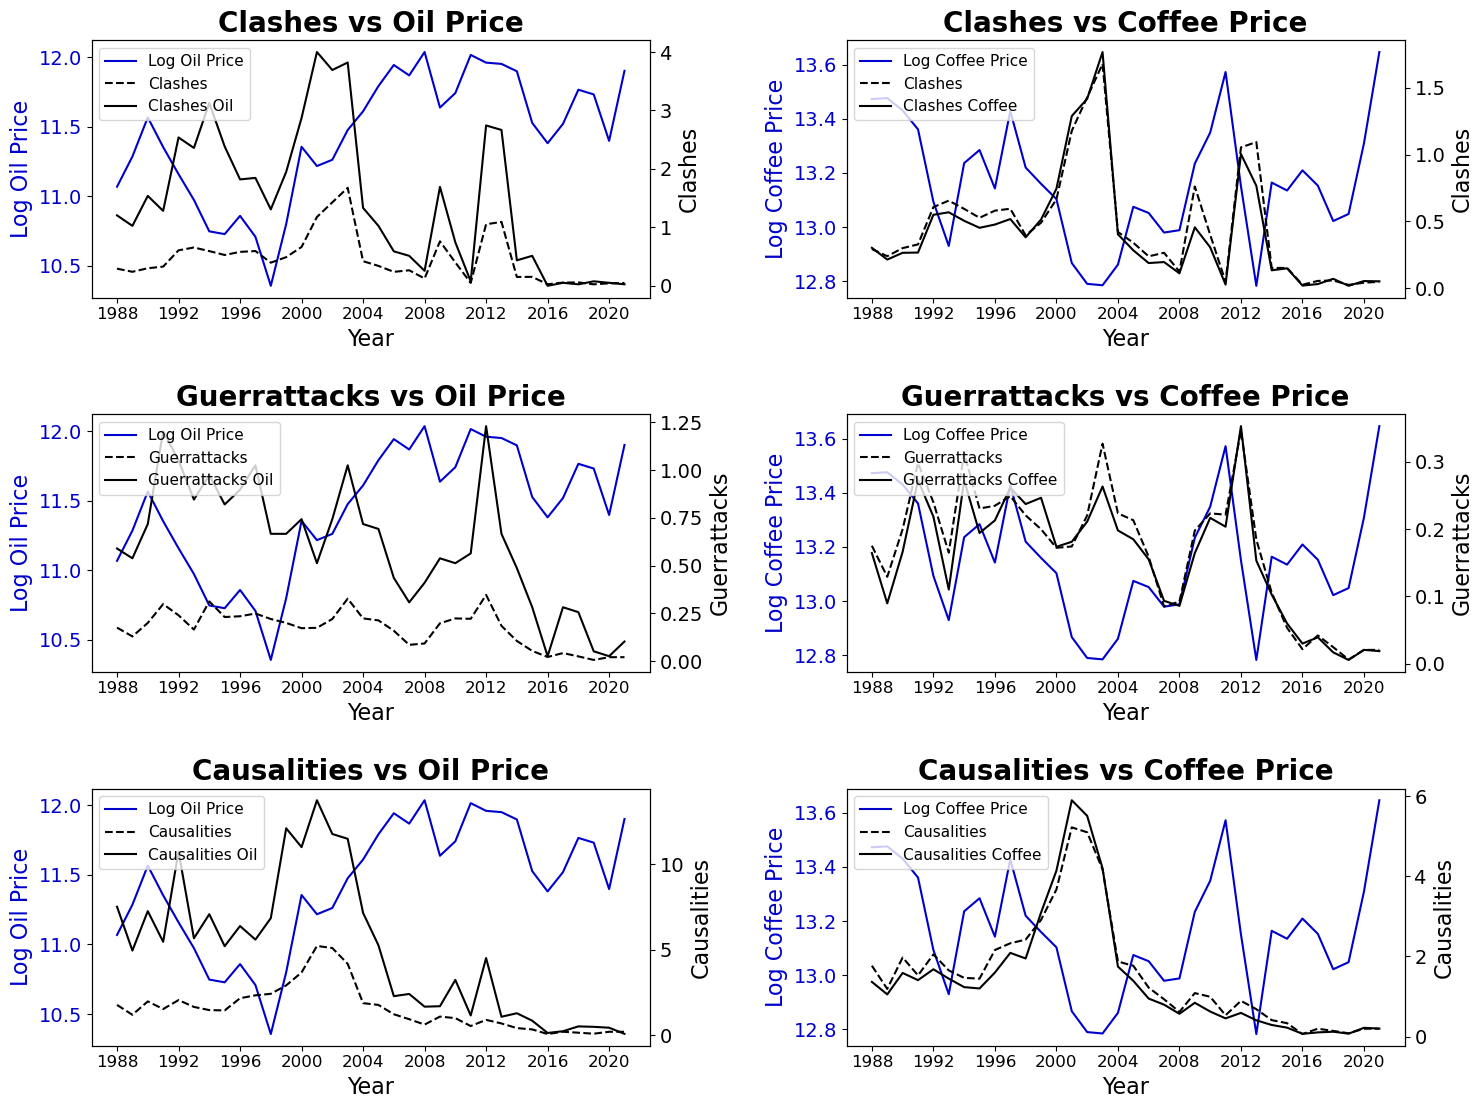

In [46]:
# define variables
variables = ['clashes', 'guerrattacks', 'causalities']
plt.rcParams.update({'font.size': 12})
# Create the figure and grid of subplots
fig = plt.figure(figsize=(15, 11.25))

for i, var in enumerate(variables):
    # Left column (Oil price)
    ax1 = fig.add_subplot(3, 2, 2*i+1)
    create_dual_axis_plot(
        ax1, y_m, 'year', 'lop', var, f'{var}_oil',
        'Log Oil Price', var.capitalize(),
        f'{var.capitalize()} vs Oil Price'
    )
    
    # Right column (Coffee price)
    ax2 = fig.add_subplot(3, 2, 2*i+2)
    create_dual_axis_plot(
        ax2, y_m, 'year', 'linternalp', var, f'{var}_coffee',
        'Log Coffee Price', var.capitalize(),
        f'{var.capitalize()} vs Coffee Price'
    )

plt.tight_layout(h_pad=2,w_pad=2)
plt.savefig('ANALYSIS/Graphs/violence_indicators_vs_prices_main.png', dpi=300, bbox_inches='tight')

### Paramilitary and Post-demobilization in appendix

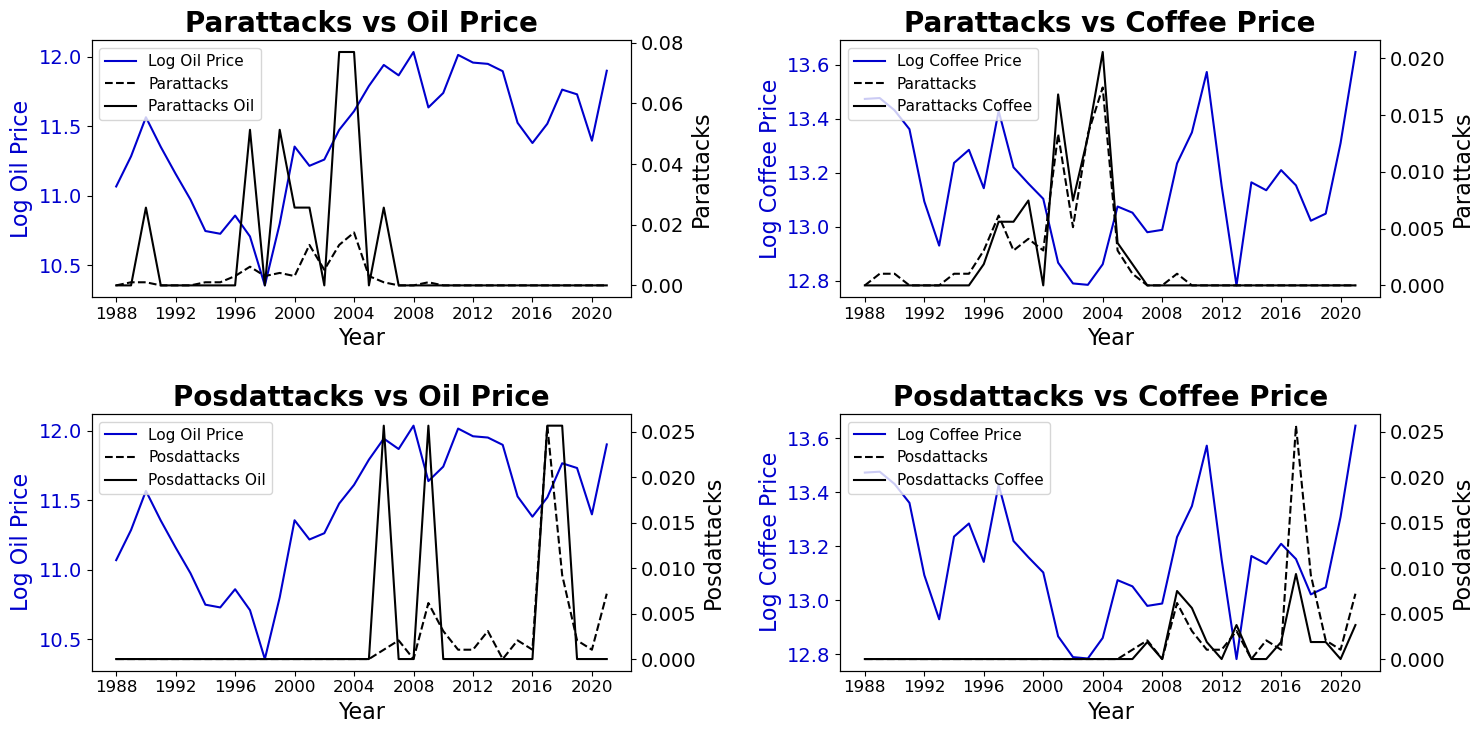

In [47]:
# define variables
variables = ['parattacks', 'posdattacks']
plt.rcParams.update({'font.size': 12})
# Create the figure and grid of subplots
fig = plt.figure(figsize=(15, 7.5))

for i, var in enumerate(variables):
    # Left column (Oil price)
    ax1 = fig.add_subplot(2, 2, 2*i+1)
    create_dual_axis_plot(
        ax1, y_m, 'year', 'lop', var, f'{var}_oil',
        'Log Oil Price', var.capitalize(),
        f'{var.capitalize()} vs Oil Price'
    )
    
    # Right column (Coffee price)
    ax2 = fig.add_subplot(2, 2, 2*i+2)
    create_dual_axis_plot(
        ax2, y_m, 'year', 'linternalp', var, f'{var}_coffee',
        'Log Coffee Price', var.capitalize(),
        f'{var.capitalize()} vs Coffee Price'
    )

plt.tight_layout(h_pad=2,w_pad=2)
plt.savefig('ANALYSIS/Graphs/violence_indicators_vs_prices_appendix.png', dpi=300, bbox_inches='tight')